In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import RepeatVector
from keras.layers import Dropout
from numpy import hstack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def form(yhat,y,mode,ix=3):
    tp=[]
    tn=[]
    fn=[]
    fp=[]
    if mode==1:
        for index,i in enumerate(yhat):
            result=i[ix]-y[index-1,ix]
            if index==0:
                continue
            if y[index-1,ix]>y[index,ix]:#dusmus
                if result>0: 
                    fn.append(abs(i[ix]-y[index,ix]))#negatif
                else:
                    tn.append(abs(i[ix]-y[index,ix]))
            else:  #artmis
                if result>0: 
                    tp.append(abs(i[ix]-y[index,ix]))#negatif
                else:
                    fp.append(abs(i[ix]-y[index,ix]))
    elif mode==0:
        for index,i in enumerate(yhat):
            result=i-y[index-1]
            if index==0:
                continue
            if y[index-1]>y[index]:#dusmus
                if result>0: 
                    fn.append(abs(i-y[index]))#negatif
                else:
                    tn.append(abs(i-y[index]))
            else:  #artmis
                if result>0: 
                    tp.append(abs(i-y[index]))#negatif
                else:
                    fp.append(abs(i-y[index]))
        
    print()
    print('Mean')
    print([np.mean(tp),np.mean(fp)])
    print([np.mean(fn),np.mean(tn)])
    print()
    print('Count')
    print([len(tp),len(fp)])
    print([len(fn),len(tn)])
    print()
    print('Max')
    if len(tp)!=0:
        print(np.max(tp),end=',')
    else:
        print(0,end=',')
    if len(fp)!=0:
        print(np.max(fp),end=' ')
    else:
        print(0,end=' ')
    print()
    if len(fn)!=0:
        print(np.max(fn),end=',')
    else:
        print(0,end=',')
    if len(tn)!=0:
        print(np.max(tn),end=' ') 
    else:
        print(0,end=' ')
    print()

In [30]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
dataset= pd.read_csv('aaaa.csv').values
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history=model.fit(X, y, epochs=200)

Epoch 1/200
23/23 [==============================] - 2s 3ms/step - loss: 0.8658
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2473
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 11/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 12/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 13/200
23/23 [=================

23/23 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 103/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 104/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 105/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 106/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 107/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 108/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 109/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 110/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 111/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 112/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 113/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 114/200
23/23 [=========

In [31]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[0.02331494, 0.04320593]
[0.016840138, 0.021415332]

Count
[310, 73]
[108, 229]

Max
0.21657515,0.25663686 
0.257787,0.09652102 


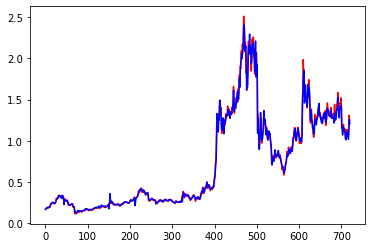

In [32]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [33]:
y[-1]

1.251218631

In [38]:
X[-1]

array([[1.07812578, 1.32358896, 0.98565822],
       [1.31605561, 1.33911866, 1.16798558],
       [1.25259888, 1.29389718, 1.13494546]])